In [6]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import category_encoders as ce 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, f1_score
from scipy.stats import reciprocal, uniform, loguniform
from sklearn.ensemble import VotingClassifier
import dmba
from dmba import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [8]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
df.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [9]:
df.shape

(43824, 13)

In [10]:
# Statistics of the data
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [11]:
# Checking for missing values
df.isnull().sum()
## There are missing values existing in pm2.5

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [12]:
# Drop missing values
df = df.dropna()
df.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [13]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


<AxesSubplot:>

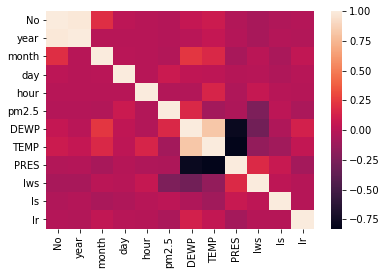

In [14]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [15]:
#Use encoder function to transform the categorical values

encoder = ce.OneHotEncoder(cols=['cbwd'])
df = encoder.fit_transform(df)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd_1,cbwd_2,cbwd_3,cbwd_4,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1,0,0,0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,1,0,0,0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,1,0,0,0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,1,0,0,0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,1,0,0,0,6.25,2,0


In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# VIF dataframe
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

   feature           VIF
0       No  8.281290e+05
1     year  7.958164e+05
2    month  3.292615e+04
3      day  2.298788e+02
4     hour  1.545492e+00
5    pm2.5  1.381283e+00
6     DEWP  5.202275e+00
7     TEMP  6.393889e+00
8     PRES  3.793980e+00
9   cbwd_1  5.602537e+11
10  cbwd_2  3.438519e+11
11  cbwd_3  5.184000e+11
12  cbwd_4  1.828427e+11
13     Iws  1.290308e+00
14      Is  1.029040e+00
15      Ir  1.053893e+00


In [17]:
# drop time variables which will not be used in this dataset
# drop PRES because of its highly correlation with DEWP and TEMP
df = df.drop(['cbwd_1','cbwd_2','cbwd_3','cbwd_4','year','month','day','hour','No','PRES'], axis=1)

In [18]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# VIF dataframe
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

  feature       VIF
0   pm2.5  1.343642
1    DEWP  2.368691
2    TEMP  2.808440
3     Iws  1.369689
4      Is  1.009991
5      Ir  1.027403


In [19]:
X = df.drop('pm2.5',axis =1)
y =df['pm2.5']

In [20]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33405 entries, 19747 to 17191
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEWP    33405 non-null  int64  
 1   TEMP    33405 non-null  float64
 2   Iws     33405 non-null  float64
 3   Is      33405 non-null  int64  
 4   Ir      33405 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.5 MB


In [22]:
# Standarded scalar
from sklearn.preprocessing import StandardScaler
cols = X_train.columns
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [23]:
X_train_sc = pd.DataFrame(X_train_sc,columns=[cols])
X_test_sc = pd.DataFrame(X_test_sc,columns=[cols])

## Prediction

In [24]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20, random_state=42)

regressors = [('XGBoost', xgb.XGBRegressor()),
              ('Random Forest', RandomForestRegressor())
]

In [25]:
# CV RMSE
from sklearn.model_selection import cross_val_score

for rg_name, rg in regressors:
    MSE_CV_scores = - cross_val_score(rg, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('{:s} CV_RMSE : {:.3f}'.format(rg_name, RMSE_CV))

XGBoost CV_RMSE : 73.677
Random Forest CV_RMSE : 80.107


In [26]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

for rg_name, rg in regressors:
    rg.fit(X_train, y_train)
    y_pred_train = rg.predict(X_train)
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    print('{:s} train RMSE : {:.3f}'.format(rg_name, RMSE_train))

XGBoost train RMSE : 67.352
Random Forest train RMSE : 50.171


In [27]:
for rg_name, rg in regressors:
    y_pred = rg.predict(X_test)
    mse = MSE(y_test, y_pred) 
    rmse = mse**(1/2)
    print('{:s} test RMSE : {:.3f}'.format(rg_name, rmse))

XGBoost test RMSE : 76.473
Random Forest test RMSE : 82.226


In [28]:
regressors_sc = [('Linear Regression',linear_model.LinearRegression()),
                 ('KNN', KNeighborsRegressor())]

In [29]:
# CV RMSE
from sklearn.model_selection import cross_val_score

for rg_name, rg in regressors_sc:
    MSE_CV_scores = - cross_val_score(rg, X_train_sc, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('{:s} CV_RMSE : {:.3f}'.format(rg_name, RMSE_CV))

Linear Regression CV_RMSE : 80.409
KNN CV_RMSE : 79.053


In [30]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

for rg_name, rg in regressors_sc:
    rg.fit(X_train_sc, y_train)
    y_pred_train = rg.predict(X_train_sc)
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    print('{:s} train RMSE : {:.3f}'.format(rg_name, RMSE_train))

Linear Regression train RMSE : 80.397
KNN train RMSE : 66.599


In [31]:
for rg_name, rg in regressors_sc:
    y_pred = rg.predict(X_test_sc)
    mse = MSE(y_test, y_pred) 
    rmse = mse**(1/2)
    print('{:s} test RMSE : {:.3f}'.format(rg_name, rmse))

Linear Regression test RMSE : 82.840
KNN test RMSE : 82.109


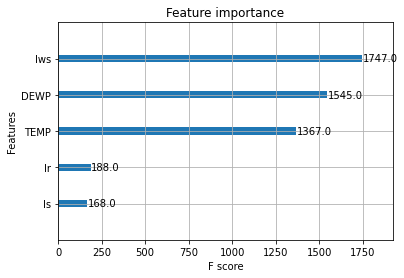

In [32]:
from xgboost import plot_importance
XGB = xgb.XGBRegressor()
XGB.fit(X_train, y_train)
plt.show(plot_importance(XGB))